In [22]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [23]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [17]:
trainlabel=traindata['label'].values

In [18]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [19]:
trainimages=trainimages.reshape(-1,28,28,1)

In [7]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [8]:
testlabel=testdata['label'].values

In [9]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [10]:
testimages=testimages.reshape(-1,28,28,1)

In [11]:
from keras.preprocessing.image import ImageDataGenerator
traingen=ImageDataGenerator(rotation_range=40,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                  shear_range=0.2,horizontal_flip=True,rescale=1/255.0,validation_split=0.2)
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [12]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(128,(3,3),activation="relu"))

model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(256,activation="relu"))

model.add(Dense(26,activation="softmax"))

In [13]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [34]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')==1.0):
      print("\nReached 100.0% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [35]:
history=model.fit(traindata_generator,epochs=100,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/100
687/687 [==============================] - 48s 69ms/step - loss: 2.7664 - accuracy: 0.1607 - val_loss: 2.2583 - val_accuracy: 0.2910
Epoch 2/100
687/687 [==============================] - 68s 99ms/step - loss: 1.9793 - accuracy: 0.3757 - val_loss: 1.7078 - val_accuracy: 0.4478
Epoch 3/100
687/687 [==============================] - 67s 98ms/step - loss: 1.5704 - accuracy: 0.4949 - val_loss: 1.3786 - val_accuracy: 0.5629
Epoch 4/100
687/687 [==============================] - 51s 74ms/step - loss: 1.3092 - accuracy: 0.5725 - val_loss: 1.2208 - val_accuracy: 0.6034
Epoch 5/100
687/687 [==============================] - 54s 78ms/step - loss: 1.1450 - accuracy: 0.6237 - val_loss: 1.0945 - val_accuracy: 0.6359
Epoch 6/100
687/687 [==============================] - 51s 74ms/step - loss: 0.9964 - accuracy: 0.6689 - val_loss: 0.9440 - val_accuracy: 0.6813
Epoch 7/100
687/687 [==============================] - 68s 99ms/step - loss: 0.8898 - accuracy: 0.7044 - val_loss: 0.8605 - val_ac

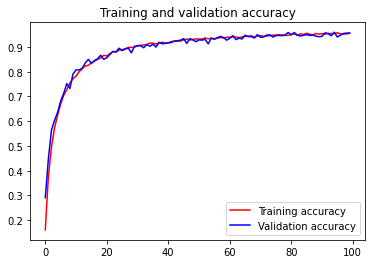

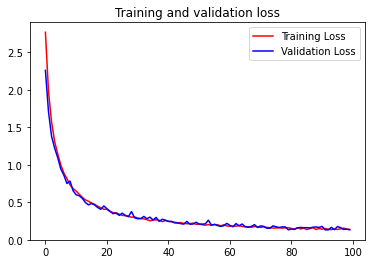

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
model.evaluate_generator(testdata_generator)[1]

Instructions for updating:
Please use Model.evaluate, which supports generators.


0.9764361381530762